# Speckle Analysis

**Scott Prahl**

**April 2018**

Adapted from the SimSpeckle Matlab script package by Duncan and Kirkpatrick.

In [1]:
%matplotlib inline
import imageio
import numpy as np
import matplotlib.pyplot as plt
import pyspeckle

# To solve "No module named 'pyspeckle'", run on the command-line (or Anaconda prompt)
#      pip install --upgrade pyspeckle

## Test image

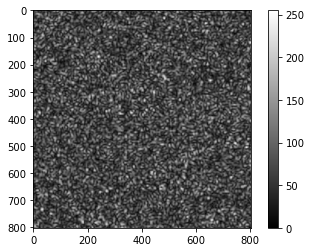

In [2]:
im = imageio.imread('http://omlc.org/~prahl/host/453/week5/speckle.png')
plt.imshow(im, cmap='gray')
plt.colorbar()
plt.show()

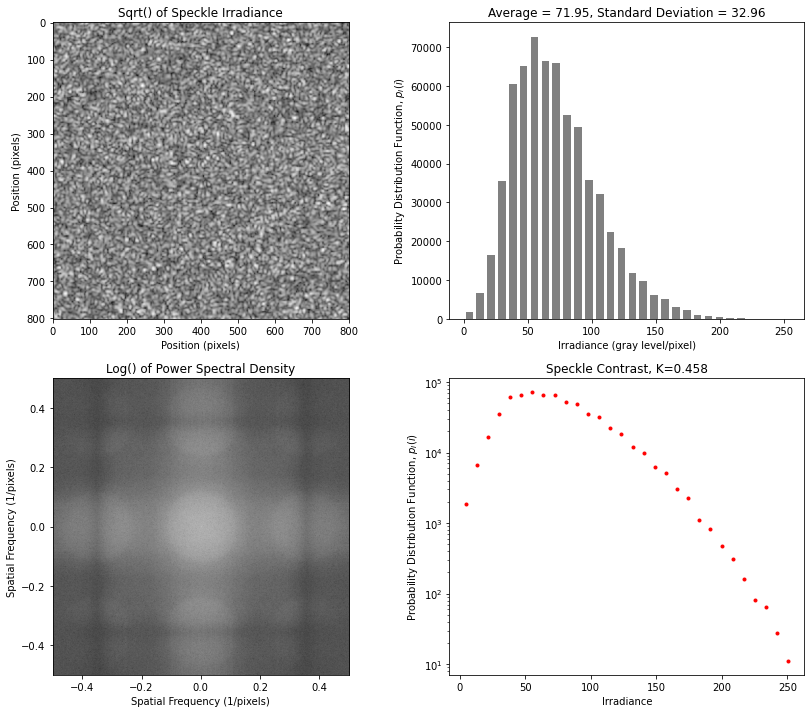

In [3]:
aplt = pyspeckle.statistics_plot(im)
aplt.show()

## Local Contrast

 $$
 z[k] = (x * y)(k - N + 1)
               = \sum_{l=0}^{||x||-1}x_l y_{l-k+N-1}^{*}
$$

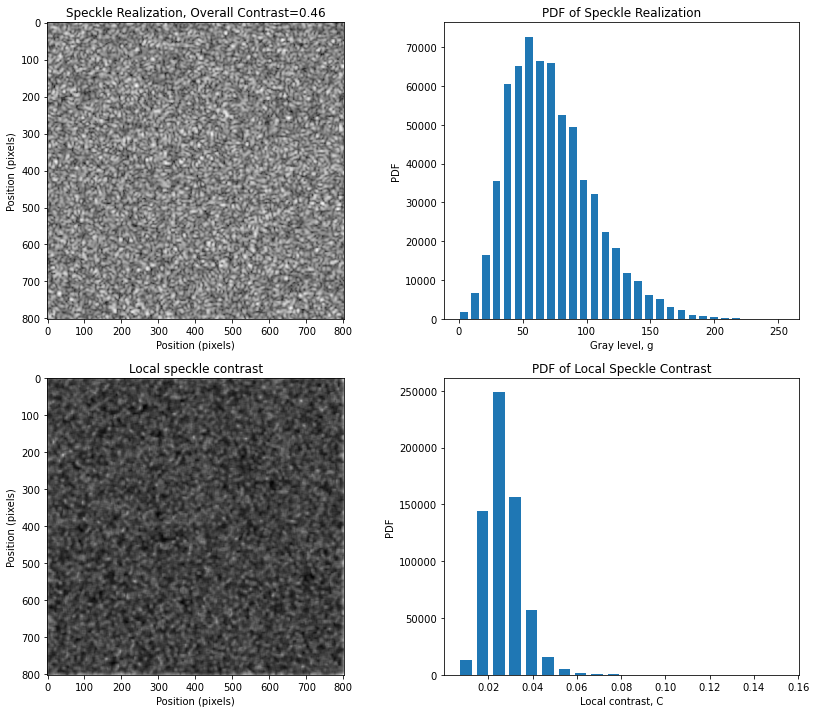

In [4]:
kernel=np.ones((10,10))
aplt=pyspeckle.local_contrast_2D_plot(im,kernel)
aplt.show()

## Exponential Speckle

### Masks used internally

These routines won't typically be called directly, but are used internally to create speckle.  These routines are not exported by default and all begin with an underscore '_'.

This just shows that the function is working as expected.

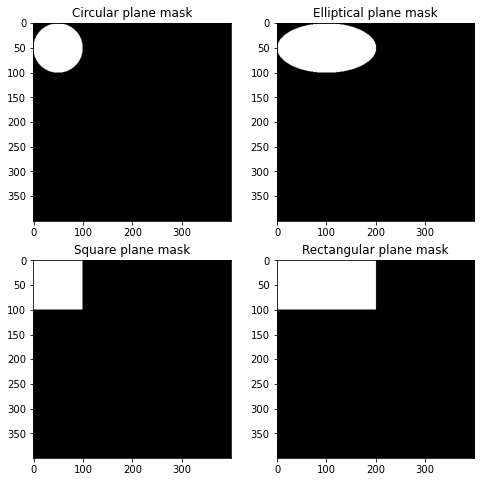

In [5]:
#import pyspeckle.pyspeckle
L=100
pix_per_speckle=4
N = pix_per_speckle * L
R = int(L/2)

plt.subplots(2,2, figsize=(8,8))
plt.subplot(2,2,1)
mask = pyspeckle.pyspeckle._create_mask(N,R,R)
plt.imshow(mask,cmap='gray')
plt.title('Circular plane mask')

plt.subplot(2,2,2)
mask = pyspeckle.pyspeckle._create_mask(N,L,R)
plt.imshow(mask,cmap='gray')
plt.title('Elliptical plane mask')

plt.subplot(2,2,3)
mask = pyspeckle.pyspeckle._create_mask(N,R,R,shape='square')
plt.imshow(mask,cmap='gray')
plt.title('Square plane mask')

plt.subplot(2,2,4)
mask = pyspeckle.pyspeckle._create_mask(N,L,R,shape='square')
plt.imshow(mask,cmap='gray')
plt.title('Rectangular plane mask')

plt.show()

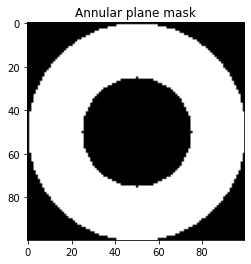

In [6]:
L=50
pix_per_speckle=2
N = pix_per_speckle * L
R = int(L/2)

mask = pyspeckle.pyspeckle._create_mask(N,R,L,shape='annulus')
plt.imshow(mask,cmap='gray')
plt.title('Annular plane mask')
plt.show()


### Isotropic Speckle at Nyquist Limit (2 pixels per smallest pixel)

This speckle pattern has an exponential probability distribution function that is spatially bandwidth-limited by the specified pixels per speckle.  The statistics are uniform in all directions.

The Power Spectral Density can be used to establish the dimensions of the
minimum speckle size. When the display reaches the edge of the image,
the speckle pattern (in that dimension) is at Nyquist, i.e., two
pixels per (minimum) speckle.  This is what we observe here.


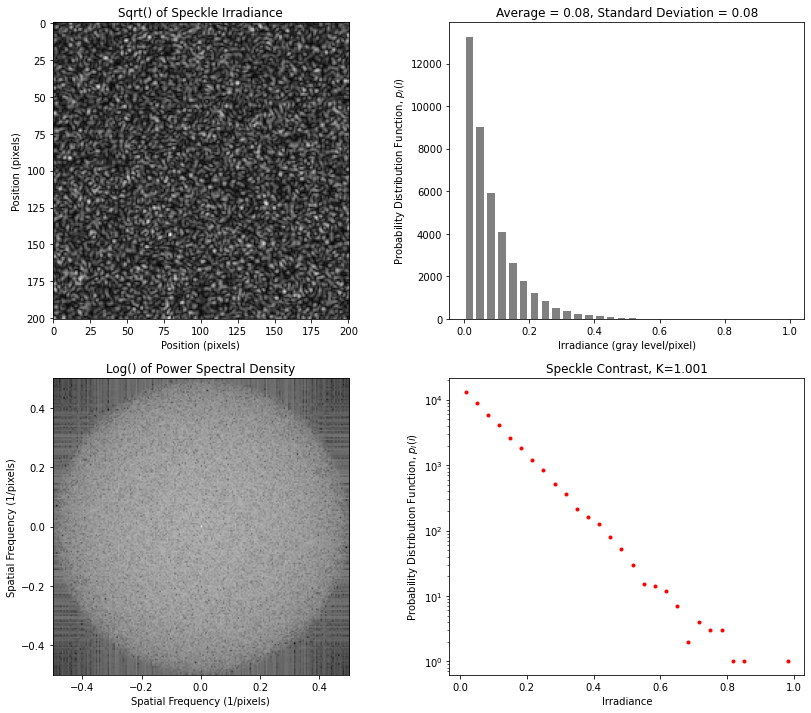

In [7]:
y = pyspeckle.create_Exponential(201,2)
aplt = pyspeckle.statistics_plot(y)
aplt.show()

### Isotropic Speckle at 4 pixels per smallest pixel

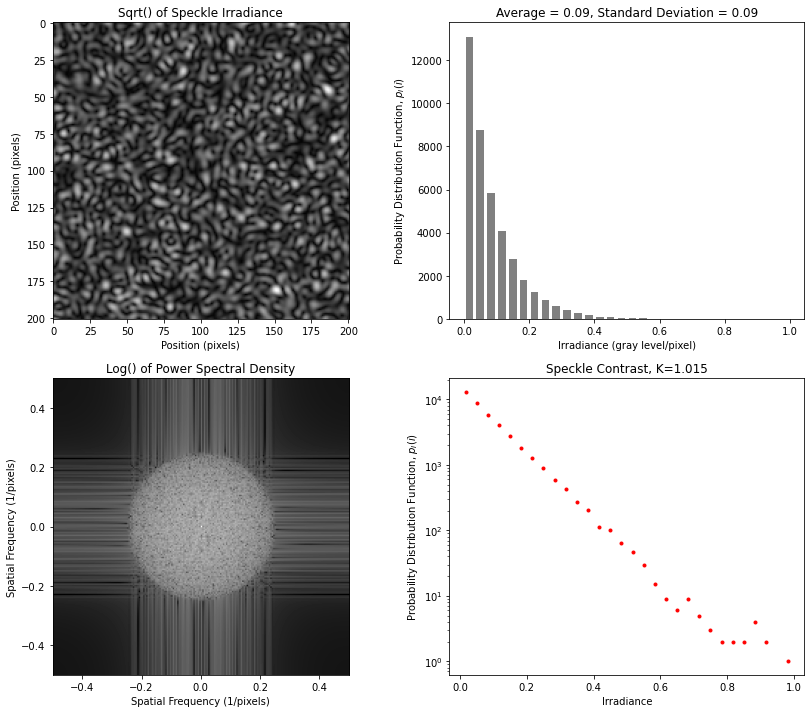

In [8]:
y = pyspeckle.create_Exponential(201,4)
aplt = pyspeckle.statistics_plot(y)
aplt.show()

### Elliptical Speckle at 4 pixels per smallest pixel

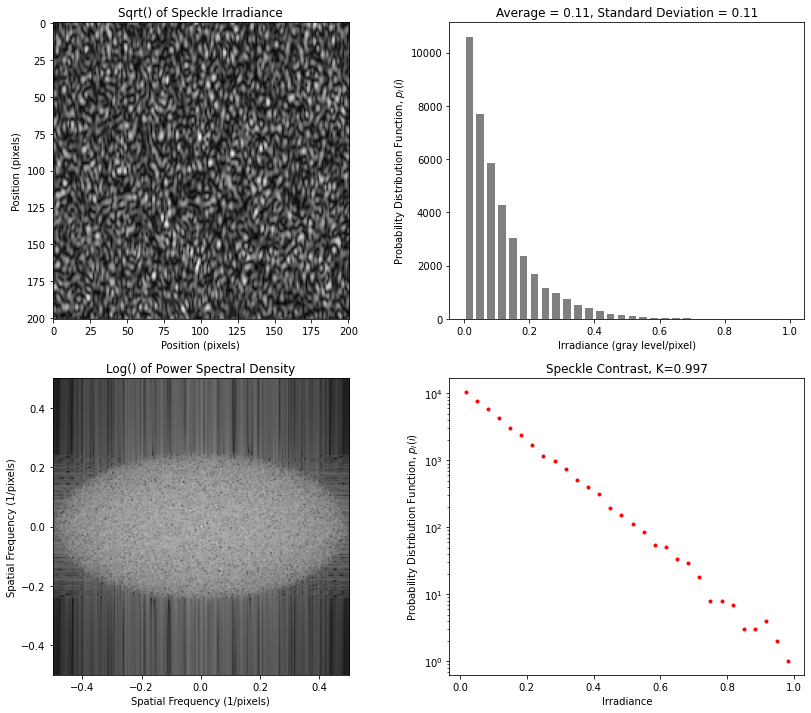

In [9]:
y = pyspeckle.create_Exponential(201,2,alpha=0.5)
aplt = pyspeckle.statistics_plot(y)
aplt.show()

### Near-Isotropic Speckle at 4 pixels per smallest pixel

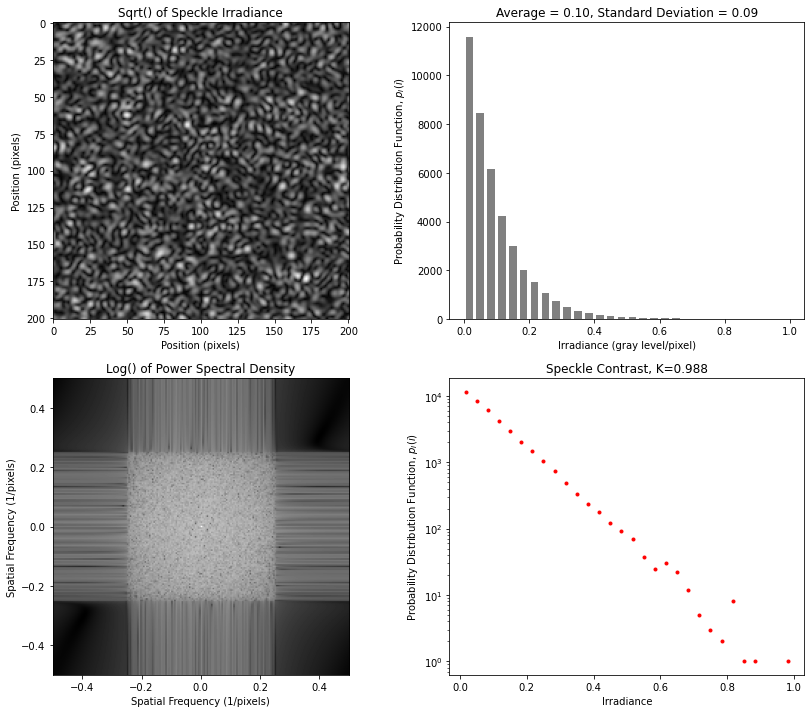

In [10]:
y = pyspeckle.create_Exponential(201,4,shape='square')
aplt = pyspeckle.statistics_plot(y)
aplt.show()

### Polarized Speckle for annular spot

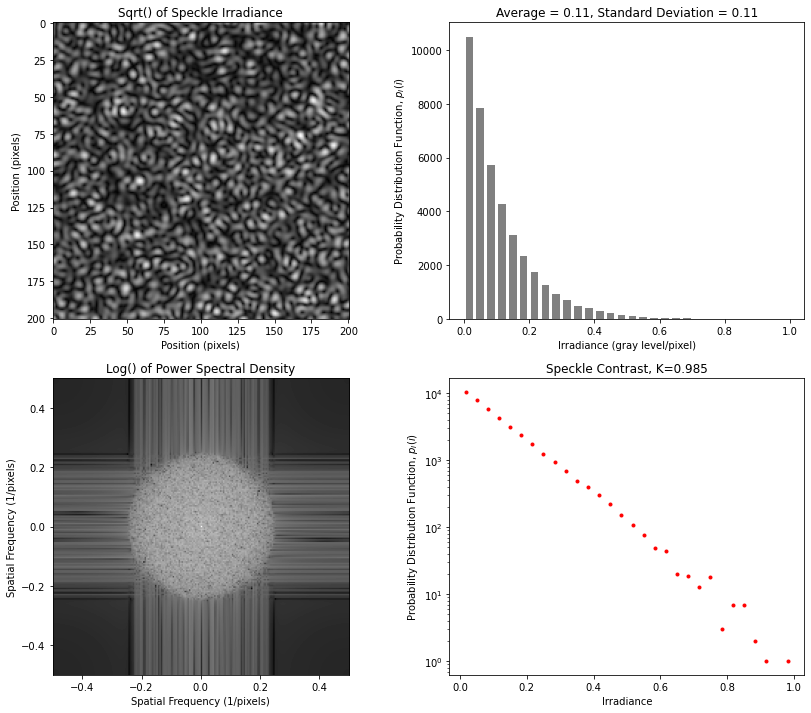

In [11]:
y = pyspeckle.create_Exponential(201,4,shape='annulus',alpha=3)
aplt = pyspeckle.statistics_plot(y)
aplt.show()

## Speckle for Polarized light

Varies by degree of polarization

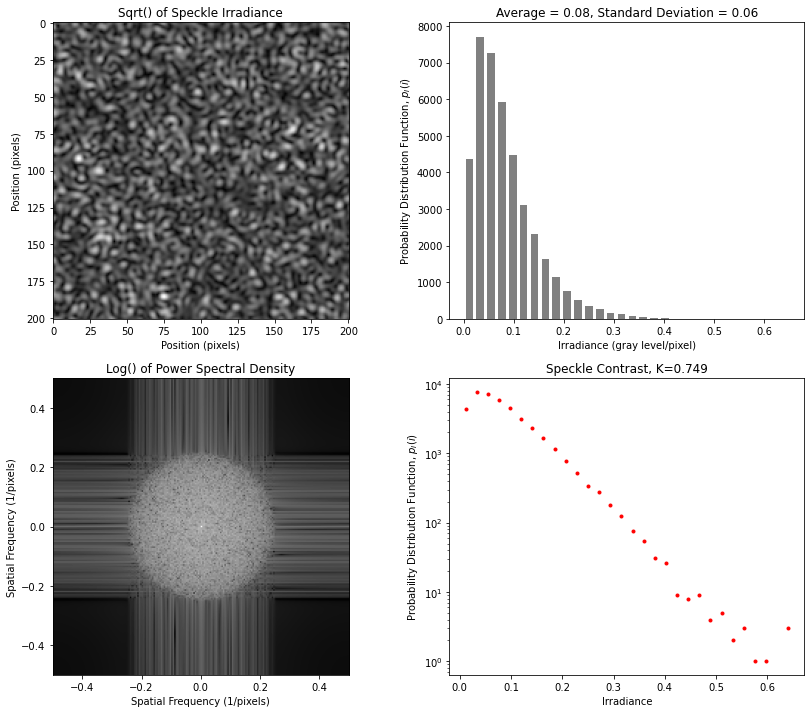

In [12]:
y = pyspeckle.create_Exponential(201,4,polarization=0.3)
aplt = pyspeckle.statistics_plot(y)
aplt.show()

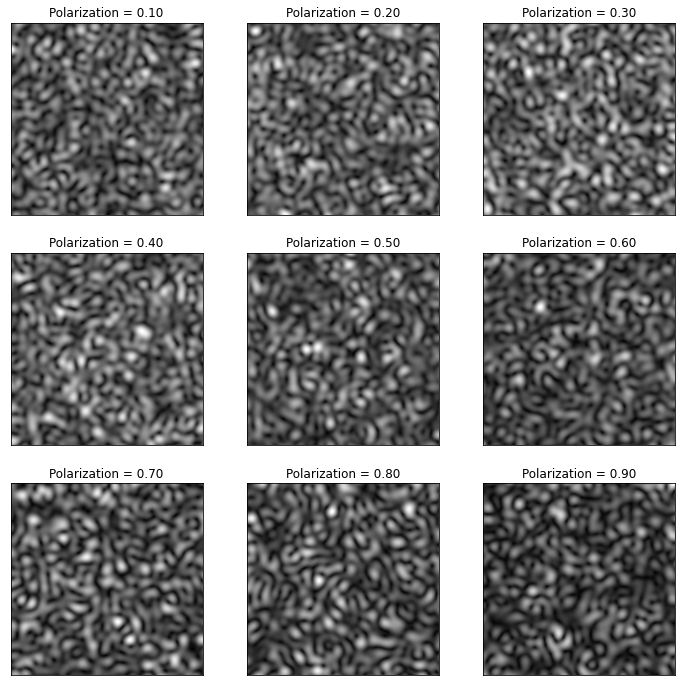

In [13]:
plt.subplots(3,3,figsize=(12,12))
for i,pol in enumerate([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]):
    plt.subplot(3,3,i+1)
    y = pyspeckle.create_Exponential(201,8,polarization=pol)
    plt.imshow(np.sqrt(y),cmap='gray')
    plt.title('Polarization = %.2f'%pol)
    plt.xticks([])
    plt.yticks([])

plt.show()

## Unpolarized Speckle

This arises from adding two speckle patterns (one for each polarization state).  The result is a pattern with a Rayleigh intensity distribution

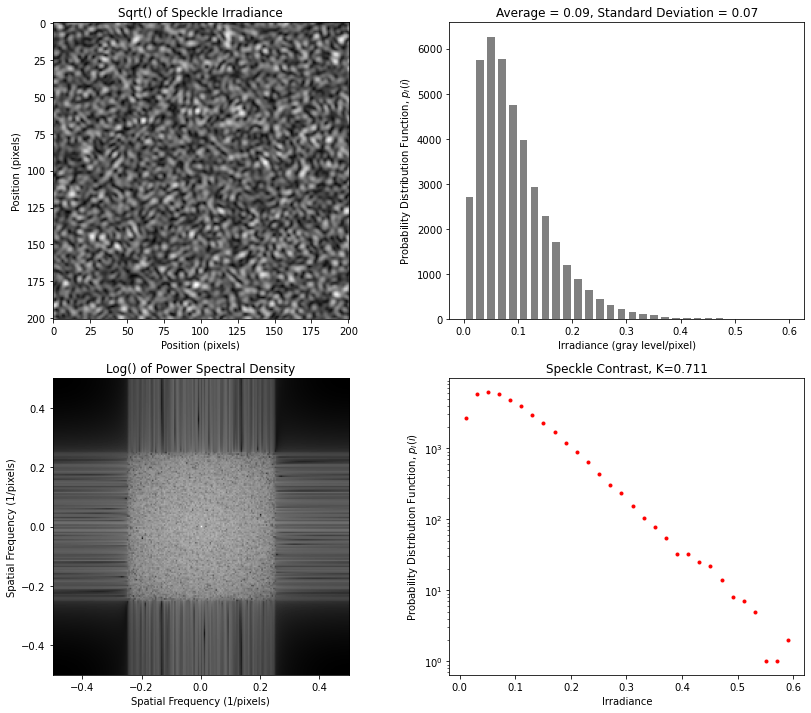

In [14]:
y = pyspeckle.create_Rayleigh(201,4,shape='square')
aplt = pyspeckle.statistics_plot(y)
aplt.show()
